In [8]:
import csv
import time
import pandas as pd
import numpy as np
import re
# from __future__ import print_function
# import sys
# print(sys.executable)

## Introduction

The following is a Project on 'how an individual can leverage data available over social media such as Twitter'. 
The types of analysis that we could perform such as:
* Select a Subject or topic of discussion (for us this is **Cambridge Analytics issue faced by Facebook**) 
* Mood classification or Sentimenet analysis 
* geospatial analysis and other forms of intuitive visualisations

For ultimately being able to better communicating results to stakeholders. This is a growing feild of study and research by policy, psychology and science students.

There are several parts to this tutorial but largely we could divide them into three parts:
* Access Twitter API
    * Authentication (oauth2)
    * Pagination
    * Rate Limiting
* Simple Sentiment Analysis (using TextBlob or our own classifier)
* Geo-Spatial Analysis

(**Note:** references used to develp code chunks would be provided above the chunk along with description)

## Authentication

Most large web scale companies use a combination of authentication and rate limiting to control access to their data to ensure that everyone using it abides by them. Twitter uses the oauth2 authentication and hence we will go forward to apply for a developer account.

## Twitter API Access

**1.** Create a Twitter Account (if you dont have one already)

**2.** Go [here](https://apps.twitter.com/app/new) and log in. 

**3.** In 'Application Management' - 'Create an Application'. Enter 'Name', 'Description' & 'Website' (can be dummy)

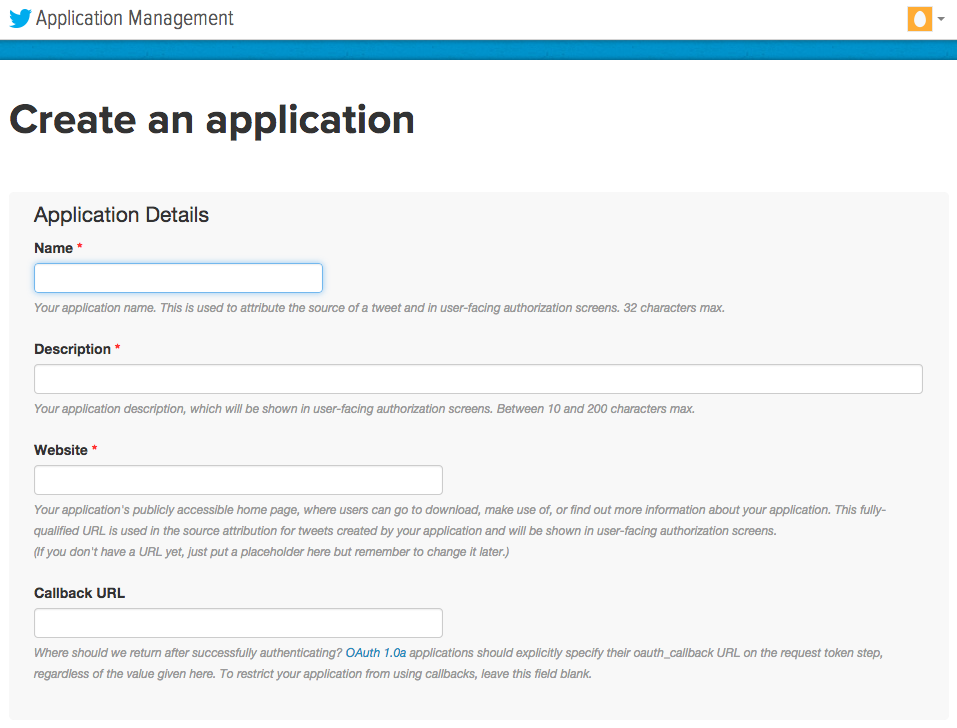

**4.** Accept the Terms of Service and click 'Create the application'

**5.** Go to 'Keys and Access Tokens'. Scroll down and select 'Create my Access Tokens' to get the Access key and Secret as well

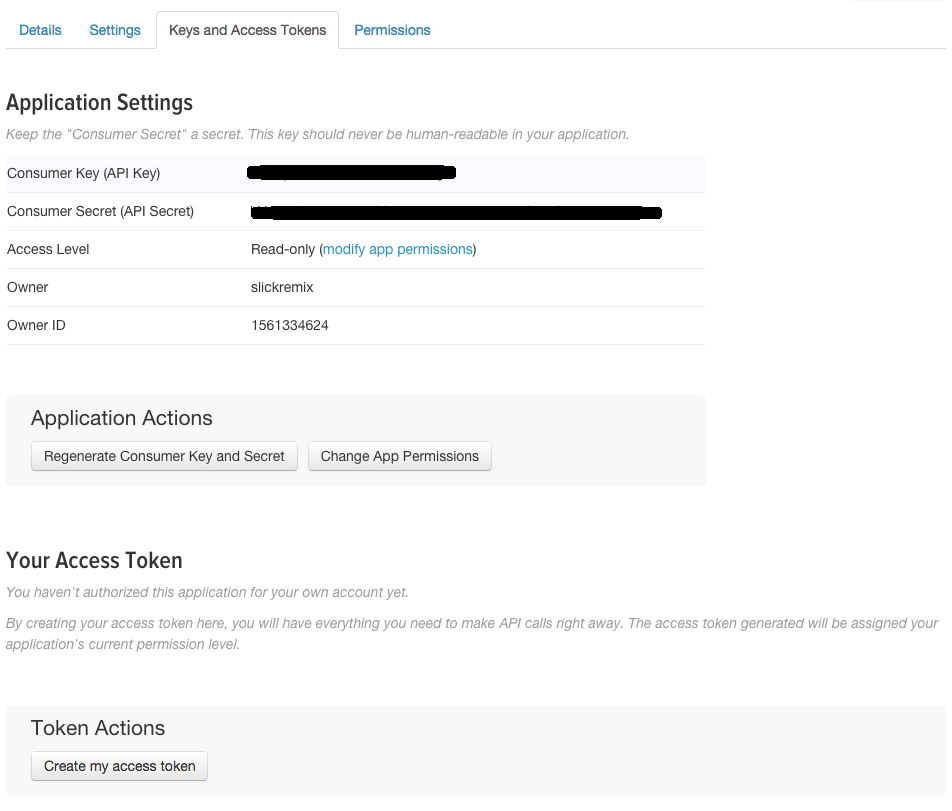

**6.** Save the keys in one file (as shown below) and access (or extract) them using the below function:

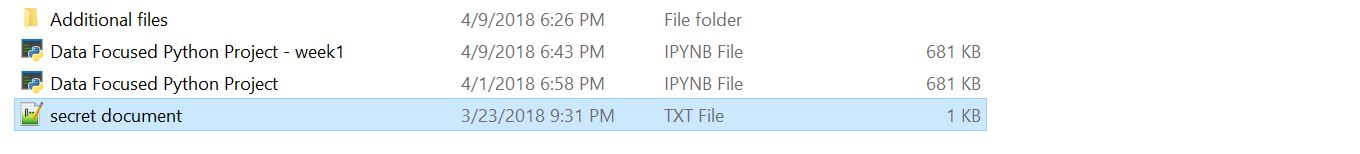

```python
>>> print(api_key, api_secret, access_token_key, access_token_secret)

api_key = "your_api_key"
api_secret = "your_api_secret"
access_token_key = "your_access_token_key"
access_token_secret = "your_access_token_secret"
```

In [14]:
def read_api_key(filepath):
    """
    Read the Twitter API Key information from file.
    Args:
        filepath (string): File containing all the API/Access Key & Secret
    Returns:
        api_key (string): The API Key
        api_secret (string): The API Secret
        access_token_key (string): The Access Token Key
        access_token_secret (string): The Access Token secret
        
    """
    with open(filepath, 'r') as f:
        store_text_file = f.read()
        api_key = re.findall(r'api_key = "(\w+)"', str(store_text_file))[0]
        api_secret = re.findall(r'api_secret = "(\w+)"', str(store_text_file))[0]
        access_token_key = re.findall(r'access_token_key = "(\w+-\w+)"', str(store_text_file))[0]
        access_token_secret = re.findall(r'access_token_secret = "(\w+)"', str(store_text_file))[0]
    return (api_key, api_secret, access_token_key, access_token_secret)     
    
api_key, api_secret, access_token_key, access_token_secret = read_api_key("secret document.txt")

## Twitter API

We will first explore 'Twitter' by simply exploring the **request** library. The procedure is as mentoined below:
* First 'API key & secret' and encode in the ASCII  format
* Use the **base64** library to encode the the key.
* Authorization in the 'headers' parameters where we pass this encoded key (along with some other parameters).
* Check for Status (200 OK) and keys that we can use from data response (access_token).
* Extract the tweets (test with 5 tweets)
* 'Study the tweets'

Source:

* [References 1](https://speca.io/speca/twitter-rest-api-v1.1)
* References 2 : Influence used from a prior idea that we had in Practical Data Science course

(**Note:** This is a simple User Authentication that permits 180 requests per 15 mins and maximum 100 tweets per each)

In [15]:
import oauth2 as oauth
import base64
import requests
import json

In [16]:
key_secret = '{}:{}'.format(api_key, api_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

In [17]:
url = '{}oauth2/token'.format('https://api.twitter.com/')

headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}

data = {
    'grant_type': 'client_credentials'
}

auth_resp = requests.post(url, headers=headers, data=data)
print('Status Code (check) : ',auth_resp.status_code)
print('Keys in data response : ', auth_resp.json().keys())

Status Code (check) :  200
Keys in data response :  dict_keys(['token_type', 'access_token'])


### Lets Extract tweets:

* Simply re-use the tokens access tokens as in above. Here the **json** library can be put to work.
* Create a 'Search Parameter' with the following keys:
    * 'search query' as 'facebook'
    * 'language' as 'en' (ISO format)
    * 'result' as 'popular' (can be 'mixed' or 'recent' as well)
    * 'count of tweets' as 5 (to sample, maximum can be 100)

In [18]:
access_token = auth_resp.json()['access_token']
search_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}

search_params = {
    'q': 'facebook',
    'lang': 'en',
    'result_type': 'popular',
    'count': 5
}

url = '{}1.1/search/tweets.json'.format('https://api.twitter.com/')

search_resp = requests.get(url, headers=search_headers, params=search_params)
tweet_data = search_resp.json()
for x in tweet_data['statuses']:
    print(x['text'])
    print(" ------------------------------ ")

I predict that @facebook will be studied in future business schools as the single greatest business catastrophe in… https://t.co/1sjnFtPctp
 ------------------------------ 
“I find it offensive that Facebook would deem us – two black chicks down with politics – ‘unsafe to the community’”… https://t.co/48sAqi8ESp
 ------------------------------ 
"When we signed up with Facebook they didn't say this platform was only for liberal views" -@DiamondandSilk slam Fa… https://t.co/FjWVAx2TZ6
 ------------------------------ 
Everytime you read the @Guardian online (which been castigating Facebook over data collection) it covertly sends yo… https://t.co/jrzKCQJkrv
 ------------------------------ 
Scoop: Facebook has suspended a second data firm, @Cubeyou, after CNBC’s @MishCastillo discovered tactics similar t… https://t.co/EIotDFZ5Wq
 ------------------------------ 
